In [25]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Гауссов наивный байесовский классификатор

Для реализации Гауссовского наивного байесовского классификатора будем использовать данные Wine из модуля sklearn datasets.

In [3]:
wine = datasets.load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine_data = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
wine_data['target'] = wine['target']

Посмотрим на данные:

In [24]:
wine_data.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


Посмотрим как распределяется содержание алкоголя по классам:

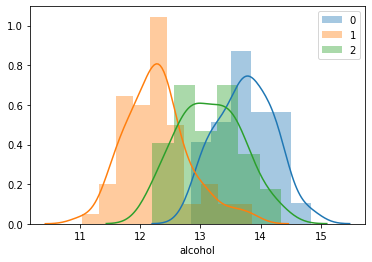

In [25]:
for i in wine_data.target.unique():
    sns.distplot(wine_data['alcohol'][wine_data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

Построим модель:

In [11]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Выполним оценку качества модели классификации:

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


Следовательно, модель построена корректно.

### Полиномиальный наивный байесовский классификатор

Используем данные iris для построения полиномиального наивного байесовского классификатора:

In [26]:
iris = pd.read_csv('C:/Users/user/Downloads/iris.csv', index_col = 'Id')

X = iris.iloc[:, 0:4]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
y_pred = nb.predict(X_test)

Выполним оценку качества модели классификации:

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


### Метрический алгоритм k-ближайших соседей

Для построения модели классификации с использованием метрического алгоритма k-ближайших соседей используем данные iris.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 10)}

In [20]:
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=True)

In [24]:
X = iris.iloc[:, 0:4]
y = iris['Species']

knn_grid.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [22]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 6}, 0.98)

Следовательно, оптимальное значение параметра k равно 6, а оценка качества модели для данного k равно 0.98.